In [ ]:
# !pip install tensorflow

In [ ]:
##### DO NOT EDIT THIS CELL!!!
##### DO NOT IMPORT ANY ADDITIONAL PACKAGES

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# keras API documentation:
# https://www.tensorflow.org/api_docs/python/tf/keras
from tensorflow.keras import datasets # https://www.tensorflow.org/api_docs/python/tf/keras/datasets
from tensorflow.keras import layers # https://www.tensorflow.org/api_docs/python/tf/keras/layers
from tensorflow.keras import activations # https://www.tensorflow.org/api_docs/python/tf/keras/activations
from tensorflow.keras import initializers # https://www.tensorflow.org/api_docs/python/tf/keras/initializers
from tensorflow.keras import losses # https://www.tensorflow.org/api_docs/python/tf/keras/losses
from tensorflow.keras import metrics # https://www.tensorflow.org/api_docs/python/tf/keras/metrics
from tensorflow.keras import optimizers # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras import regularizers # https://www.tensorflow.org/api_docs/python/tf/keras/regularizers
from tensorflow.keras.optimizers import schedules # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules
from tensorflow.keras import callbacks # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
from tensorflow.keras import utils # https://www.tensorflow.org/api_docs/python/tf/keras/utils
from tensorflow.keras import models # https://www.tensorflow.org/api_docs/python/tf/keras/models

In [ ]:
##### DO NOT EDIT THIS CELL!!!

# load the MNIST dataset
# - contains 70,000 grayscale images (handwritten digits)
# - images are low resolution (28 by 28 pixels)
# - 10 categories (labeled 0 through 9)
# - 60,000 images in train and 10,000 images in test

mnist = datasets.mnist

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = 10

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

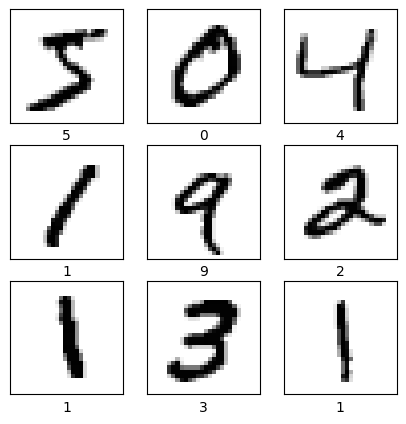

In [ ]:
##### DO NOT EDIT THIS CELL!!!

# view a sample of 9 images from the training set
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([

    tf.keras.Input(shape=(28, 28, 1)),
    layers.Rescaling(1.0 / 255),

    # (1) First convolution + max pooling
    layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    # (2) Second convolution + max pooling
    layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    # (3) Flatten before dense layer
    layers.Flatten(),

    # (4) Dense output layer
    layers.Dense(10, activation='softmax'),
])


In [ ]:
model.compile(

    # (5) Optimizer
    optimizer=optimizers.Adam(learning_rate=0.001),

    # (6) Loss function
    loss=losses.SparseCategoricalCrossentropy(),

    # (7) Metrics
    metrics=['accuracy'],
)


In [ ]:
%%time

##### DO NOT EDIT THIS CELL!!!

# TRAIN model
# ensure you can explain the number of gradient descent steps in each epoch
history = model.fit(

    # training set images
    train_images,

    # training set labels
    train_labels,

    # number of epochs to train
    epochs=15,

    # mini-batch SGD batch size
    # if None, defaults to 32
    batch_size=128,

    # validation set - can use validation_split or validation_data
    validation_split=0.1,
)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.7049 - loss: 1.0381 - val_accuracy: 0.9615 - val_loss: 0.1441
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9556 - loss: 0.1558 - val_accuracy: 0.9713 - val_loss: 0.0970
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9683 - loss: 0.1049 - val_accuracy: 0.9785 - val_loss: 0.0762
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9728 - loss: 0.0906 - val_accuracy: 0.9787 - val_loss: 0.0734
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9763 - loss: 0.0779 - val_accuracy: 0.9817 - val_loss: 0.0602
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9784 - loss: 0.0711 - val_accuracy: 0.9823 - val_loss: 0.0599
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9797 - loss: 0.0637 - val_accuracy: 0.9837 - val_loss: 0.0575
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9824 - loss: 0.0577 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


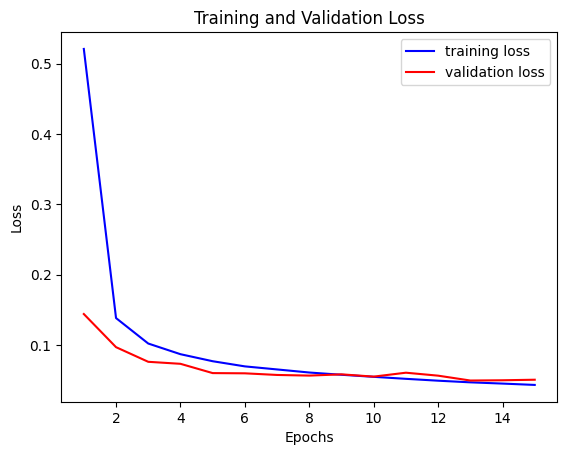

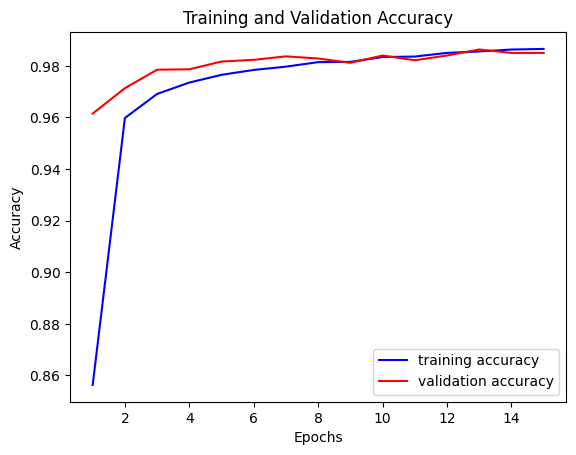

In [ ]:
##### DO NOT EDIT THIS CELL!!!

# PLOT loss and accuracy for train and validation data

# model.fit() returns a History object that contains a dictionary with everything that happened during training
# we can use it to plot training/validation loss and training/validation accuracy
history_dict = history.history
print (history_dict.keys())

# plot loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
##### DO NOT EDIT THIS CELL!!!

# EVALUATE model
# you should end up with a test accuracy of ~0.99
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print ("\ntest set loss: ", round(test_loss,4), "\ntest set accuracy: ", round(test_acc,4))

313/313 - 1s - 5ms/step - accuracy: 0.9849 - loss: 0.0469

test set loss:  0.0469 
test set accuracy:  0.9849
